In [28]:
import numpy as np
import matplotlib.pyplot as plt

## Question 1

In [29]:
data = np.array([
    [3, 4, 8, 15, 25, 44, 50, 52],
    [3, 4, 8, 15, 25, 44, 50, 52],
    [3, 4, 8, 15, 25, 44, 50, 52],
    [3, 4, 8, 15, 25, 44, 50, 52],
    [3, 4, 8, 15, 25, 44, 50, 52],
    [3, 4, 8, 15, 25, 44, 50, 52],
    [3, 4, 8, 15, 25, 44, 50, 52],
    [3, 4, 8, 15, 25, 44, 50, 52]
])

In [30]:
def to_fixed_point(data, n=8):
    return np.round(data * 2**n).astype(int)

def show_data(data, show_now=True, name='', fmt=None):
    fig, ax = plt.subplots()
    
    if name != '':
        ax.set_title(name)
    
    im = ax.imshow(data, cmap='YlOrRd')

    # Add colorbar
    ax.figure.colorbar(im, ax=ax)
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            val = data[i, j] if fmt is None else fmt(data[i, j])
            ax.text(j, i, val,
                    ha="center", va="center", color="w")
    if show_now:
        plt.show()
    return fig, ax

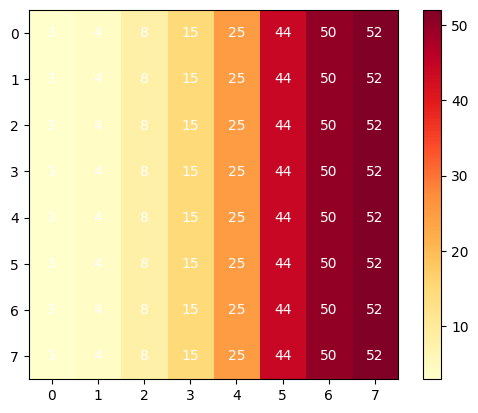

(<Figure size 640x480 with 2 Axes>, <Axes: >)

In [31]:
show_data(data)

### Prewitt Operator

In [32]:
def flip(kernal):
    return np.flipud(np.fliplr(kernal))

In [33]:
def conv2d(img, kernel):
    h, w = img.shape
    k_h, k_w = kernel.shape
    o = np.zeros(shape=(h-k_h+1, w-k_w+1))
    o_h, o_w = o.shape
    for _h in range(o_h):
        for _w in range(o_w):
            o[_h, _w] = np.sum(img[_h:_h+k_h, _w:_w+k_w] * kernel)
    return o


In [34]:
def plt_result(img, kernel, kernel_name, show_all_values=False, fmt=None):
    result = conv2d(img, kernel)
    fliped = conv2d(img, flip(kernel))
    plt.subplot(131), plt.imshow(data, cmap='YlOrRd'), plt.title('Original')
    plt.subplot(132), plt.imshow(result, cmap='YlOrRd'), plt.title(kernel_name)
    plt.subplot(133), plt.imshow(fliped, cmap='YlOrRd'), plt.title(kernel_name+'.Flip')
    plt.show()

    plt.suptitle(kernel_name)
    if show_all_values:
        show_data(result, False, name=kernel_name, fmt=fmt)
        show_data(fliped, False, name=kernel_name+'.Flip', fmt=fmt)
    plt.show()
    # print(kernel_name+'\n', result)
    # print(kernel_name+'.Flip\n', fliped)
    

In [35]:
h_x = np.array([[-1, 0, 1]] * 3)
h_y = np.rot90(h_x, 1)
h_x, h_y

(array([[-1,  0,  1],
        [-1,  0,  1],
        [-1,  0,  1]]),
 array([[ 1,  1,  1],
        [ 0,  0,  0],
        [-1, -1, -1]]))

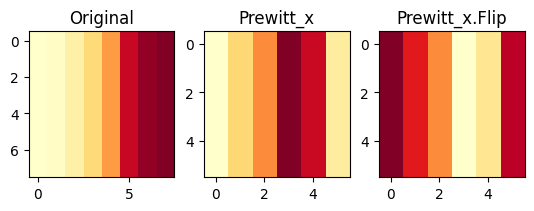

<Figure size 640x480 with 0 Axes>

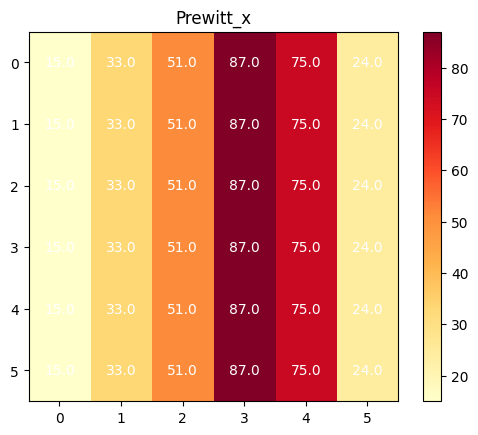

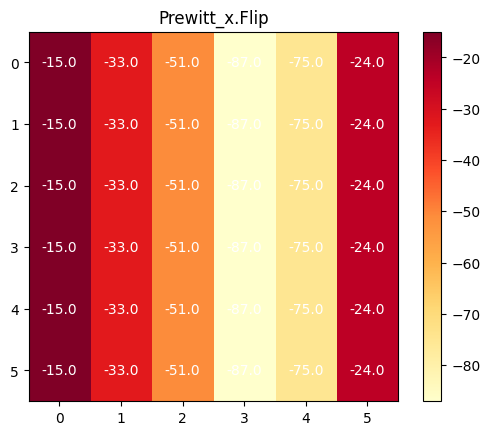

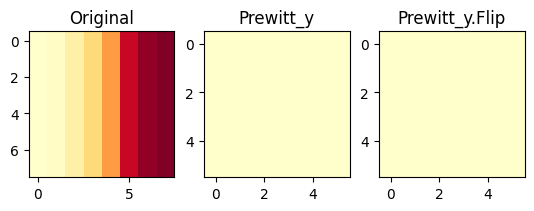

<Figure size 640x480 with 0 Axes>

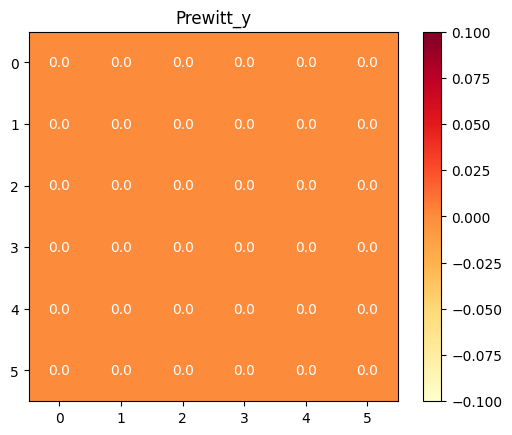

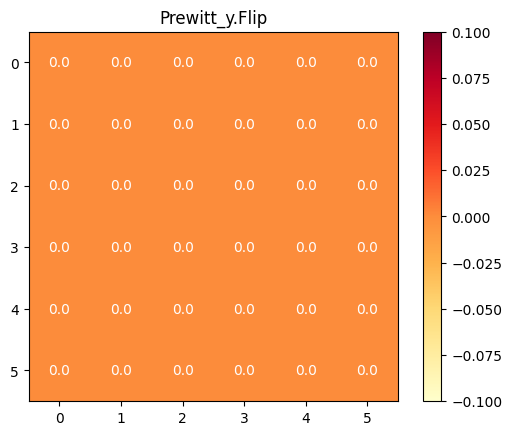

In [36]:
plt_result(data, h_x, 'Prewitt_x', show_all_values=True)
plt_result(data, h_y, 'Prewitt_y', show_all_values=True)

### Sobel operator

In [37]:
h_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])
h_y = np.rot90(h_x, 1)
h_x, h_y

(array([[-1,  0,  1],
        [-2,  0,  2],
        [-1,  0,  1]]),
 array([[ 1,  2,  1],
        [ 0,  0,  0],
        [-1, -2, -1]]))

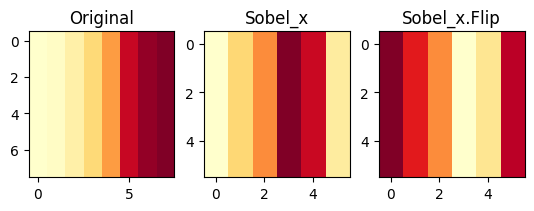

<Figure size 640x480 with 0 Axes>

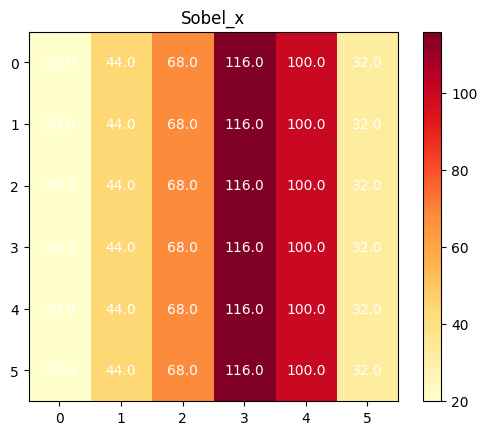

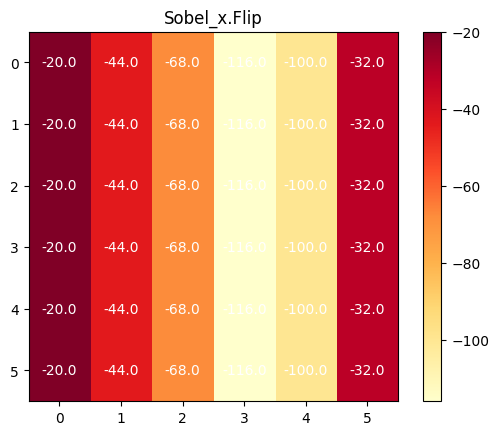

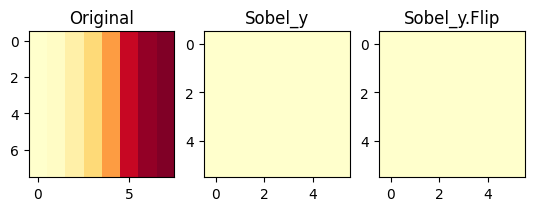

<Figure size 640x480 with 0 Axes>

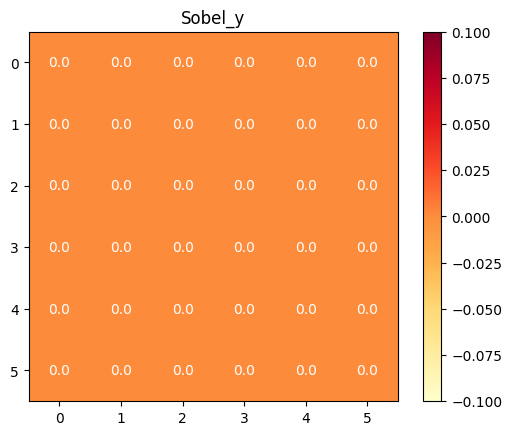

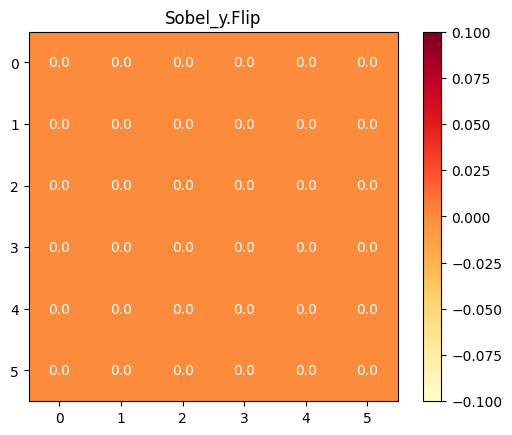

In [38]:
plt_result(data, h_x, 'Sobel_x', show_all_values=True)
plt_result(data, h_y, 'Sobel_y', show_all_values=True)

### Laplacian operator

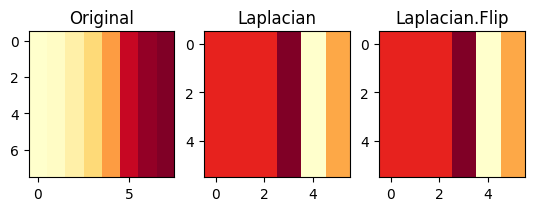

<Figure size 640x480 with 0 Axes>

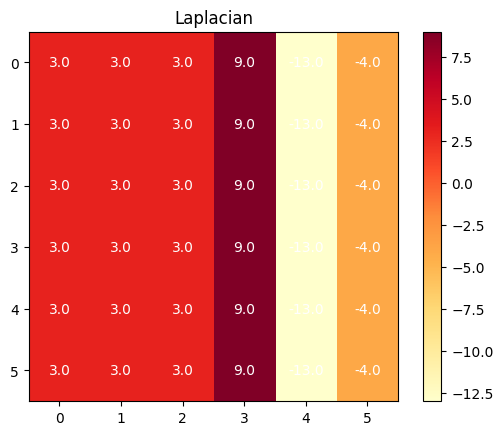

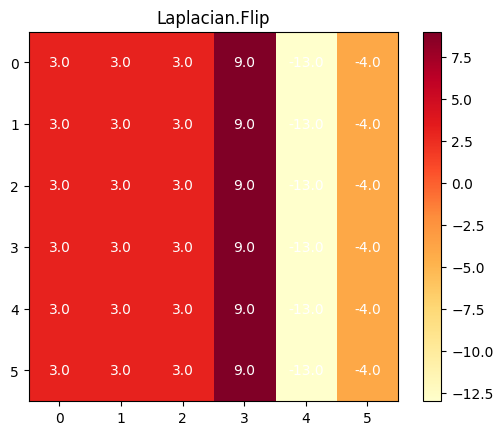

In [39]:
h = np.array([
    [0,  1, 0],
    [1, -4, 1],
    [0,  1, 0]
])
plt_result(data, h, 'Laplacian', show_all_values=True)

## Question 2


## Question 3

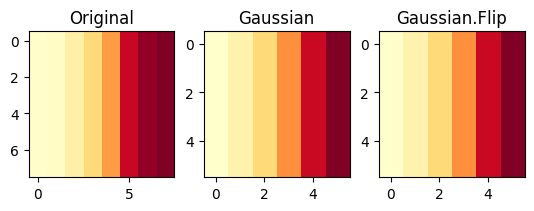

<Figure size 640x480 with 0 Axes>

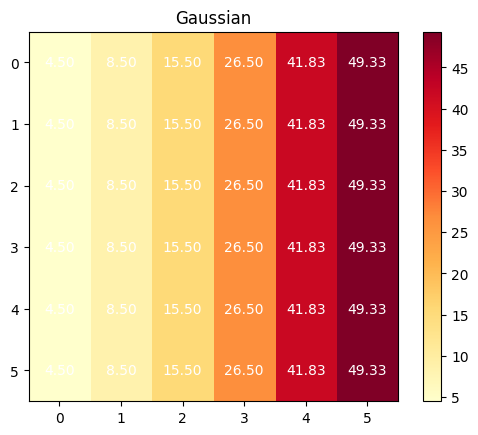

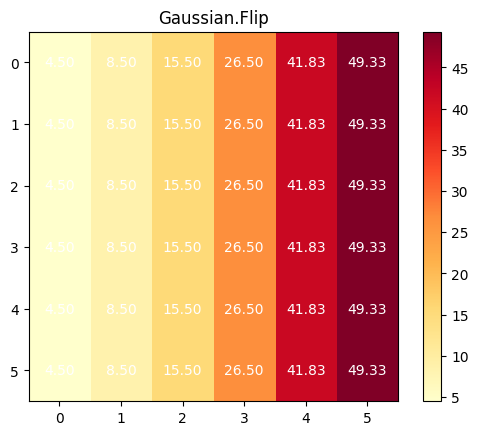

In [40]:
mask = np.array([
    [1/36, 1/9, 1/36],
    [1/ 9, 4/9,  1/9],
    [1/36, 1/9, 1/36]
])

plt_result(data, mask, 'Gaussian', show_all_values=True, fmt=lambda x: f'{x:.2f}')

In [47]:
m_x = np.array([
    [1/6],
    [2/3],
    [1/6]
])
m_y = np.array([
    [1/6, 2/3, 1/6]
])

m_x @ m_y, mask, m_x @ m_y == mask

(array([[0.02777778, 0.11111111, 0.02777778],
        [0.11111111, 0.44444444, 0.11111111],
        [0.02777778, 0.11111111, 0.02777778]]),
 array([[0.02777778, 0.11111111, 0.02777778],
        [0.11111111, 0.44444444, 0.11111111],
        [0.02777778, 0.11111111, 0.02777778]]),
 array([[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]]))

(<Axes: title={'center': 'H_x @ H_y'}>,
 Text(0.5, 1.0, 'H_x @ H_y'))

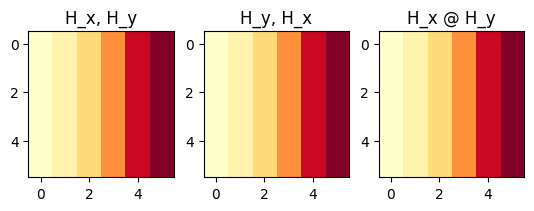

In [52]:
conv_x_y = conv2d(conv2d(data, m_x), m_y)
conv_y_x = conv2d(conv2d(data, m_y), m_x)
conv_whole = conv2d(data, m_x @ m_y)
plt.subplot(131), plt.imshow(conv_x_y, cmap='YlOrRd'), plt.title('H_x, H_y')
plt.subplot(132), plt.imshow(conv_y_x, cmap='YlOrRd'), plt.title('H_y, H_x')
plt.subplot(133), plt.imshow(conv_whole, cmap='YlOrRd'), plt.title('H_x @ H_y')

对于计算量，对于 $N\times N$ 的图片，其需要 $O(9N^2)$ 个乘法，$O(8N^2)$ 个加法，所以总的计算量为 $O(17N^2)$

对于变为 $(3\times 1) * (1 \times 3)$ 的卷积核，每个卷积核需要进行 $O(3N^2)$ 个乘法，$O(2N^2)$ 个加法。因此整体的计算量为 $O(10N^2)$